###Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

###Data collection and analysis

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Mall_Customers.csv')

In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df['Gender'].describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.shape

(200, 5)

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

###Pre-processing

In [14]:
#separating the worthy features
X = df.iloc[:,[3,4]].values

####Number of clusters

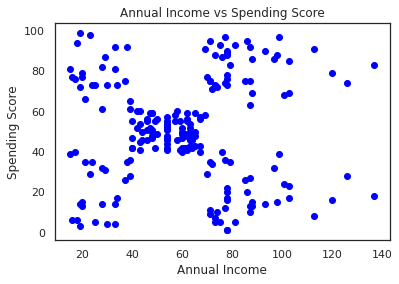

In [23]:
#pattern for 5 clusters
plt.scatter(x=df['Annual Income (k$)'],
            y=df['Spending Score (1-100)'],
            color='blue')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

In [25]:
#wcss value for different number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

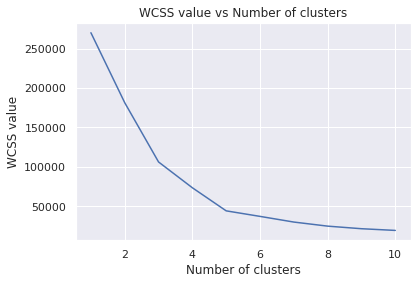

In [27]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('WCSS value vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')
plt.show()

###Training the model

In [28]:
kmeans = KMeans(n_clusters=5, init='k-means++')

#return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


####Visualizing the cluster

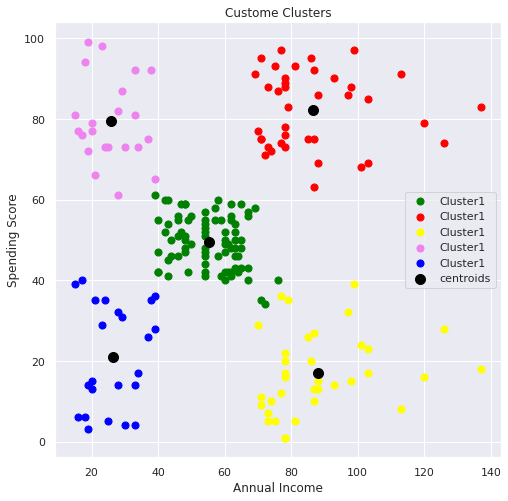

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster1')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster1')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster1')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster1')

#centroids
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=100,
            c='black',
            label='centroids')
plt.title('Custome Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

###Acknowledgements
<p>Dataset Mall Customer Segmentation from Kaggle: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python</p>
<p>Project 13. Customer Segmentation using K-Means Clustering with Python from Siddhardhan: https://www.youtube.com/watch?v=SrY0sTJchHE</p>